In [22]:
from rapidfuzz import fuzz
import pandas as pd

# Popular car models (2023–2025)
popular_models = [
    "Bezza", "Axia", "Myvi", "Saga", "Alza",
    "Ativa", "Vios", "City", "X50", "Hilux"
]

popular_brands = [
    "Perodua", "Proton", "Toyota", "Honda", "Chery", "Mitsubishi", "BYD", 
    "Mercedes-Benz", "Mazda", "BMW", "Nissan", "Isuzu"
]

# Typo test cases (query, expected model/brand)
eval_cases = [
    # Models only
    ("bezxa", "Bezza"),
    ("bizza", "Bezza"),
    ("axla", "Axia"),
    ("aksia", "Axia"),
    ("myvee", "Myvi"),
    ("sagha", "Saga"),
    ("alzza", "Alza"),
    ("attiva", "Ativa"),
    ("vi0s", "Vios"),   # OCR: 0 vs o
    ("ciity", "City"),
    ("x-5o", "X50"),    # 5 vs S vs o
    ("hilax", "Hilux"),
    ("hiluks", "Hilux"),

    # Brands
    ("perodue", "Perodua"),
    ("perjdia", "Perodua"),
    ("[roton", "Proton"),
    ("protoon", "Proton"),
    ("toyouta", "Toyota"),
    ("hinda", "Honda"),
    ("neesun", "Nissan"),          # phonetic
    ("merc benz", "Mercedes-Benz"),
    ("benz", "Mercedes-Benz"),     # abbreviation
    ("bmww", "BMW"),
    ("bydd", "BYD"),
    ("wolkswagen", "Volkswagen"), 
    ("p495on", "Proton"),          # OCR: numbers
    ("p4tons", "Proton"),
    ("jpnda", "Honda"),            # keyboard typo
    ("protin", "Proton"),
    ("e-mas seven", "E-Mas 7"),    # number word
    ("xseventy", "X70"),           # number word
    ("cx thirty", "CX-30"),        # number word
    ("x-7o", "X70"),               # OCR: 7 vs T
    (",yvi", "Myvi"),              # OCR: , vs m
    ("sivic", "Civic"),            # phonetic

    # Extra OCR confusions
    ("t0y0ta", "Toyota"),          # 0 vs o
    ("h0nda", "Honda"),
    ("v1os", "Vios"),

    # Extra phonetic cases
    ("nisan", "Nissan"),
    ("merz", "Mercedes-Benz"),
    ("bemer", "BMW"),
    ("civik", "Civic"),

    # Concatenation / spacing
    ("mercedesbenz", "Mercedes-Benz"),
    ("perod u a", "Perodua"),
    ("hondacity", "City"),

    # Word-number transcriptions
    ("x fifty", "X50"),
    ("c x thirty", "CX-30"),

    # Keyboard adjacency mistakes
    ("aqia", "Axia"),
    ("citu", "City"),
    ("hilud", "Hilux"),
]


results = []
for query, expected in eval_cases:
    score = fuzz.ratio(query.lower(), expected.lower())
    results.append({
        "Query": query,
        "Expected": expected,
        "Fuzzy Score": score,
        "Pass @75?": "✅" if score >= 75 else "❌"
    })

df = pd.DataFrame(results)
print(df)

# Summary stats
pass_count = sum(score >= 75 for score in df["Fuzzy Score"])
total = len(df)
print("\nThreshold @75:")
print(f"Passes: {pass_count}/{total} ({pass_count/total*100:.1f}%)")
print(f"Fails: {total-pass_count}/{total} ({(total-pass_count)/total*100:.1f}%)")


           Query       Expected  Fuzzy Score Pass @75?
0          bezxa          Bezza    80.000000         ✅
1          bizza          Bezza    80.000000         ✅
2           axla           Axia    75.000000         ✅
3          aksia           Axia    66.666667         ❌
4          myvee           Myvi    66.666667         ❌
5          sagha           Saga    88.888889         ✅
6          alzza           Alza    88.888889         ✅
7         attiva          Ativa    90.909091         ✅
8           vi0s           Vios    75.000000         ✅
9          ciity           City    88.888889         ✅
10          x-5o            X50    57.142857         ❌
11         hilax          Hilux    80.000000         ✅
12        hiluks          Hilux    72.727273         ❌
13       perodue        Perodua    85.714286         ✅
14       perjdia        Perodua    71.428571         ❌
15        [roton         Proton    83.333333         ✅
16       protoon         Proton    92.307692         ✅
17       t

C:\Users\aykay\AppData\Local\Temp\ipykernel_24892\632724900.py:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(highlight_pass_fail, subset=["Pass @75?"])
C:\Users\aykay\AppData\Local\Temp\ipykernel_24892\632724900.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Query", y="Fuzzy Score", data=df, palette="viridis")


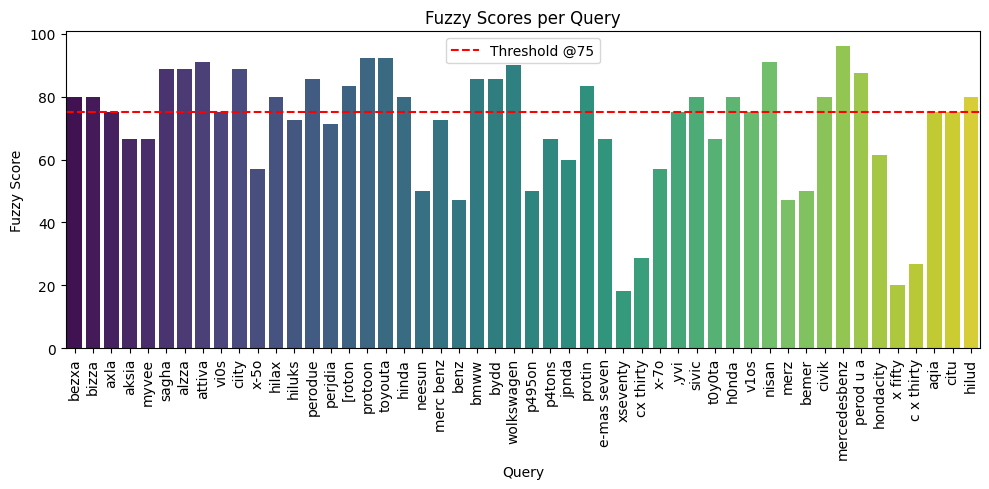

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Color-coded DataFrame
def highlight_pass_fail(val):
    color = 'lightgreen' if val == "✅" else 'salmon'
    return f'background-color: {color}'

styled_df = df.style.applymap(highlight_pass_fail, subset=["Pass @75?"])

# Threshold comparison
thresholds = [70, 75, 80, 85]
threshold_results = []
for t in thresholds:
    pass_count = sum(score >= t for score in df["Fuzzy Score"])
    threshold_results.append({
        "Threshold": t,
        "Pass Rate": pass_count / total * 100,
        "Fail Rate": (total - pass_count) / total * 100,
    })

# Score distribution
plt.figure(figsize=(10,5))
sns.barplot(x="Query", y="Fuzzy Score", data=df, palette="viridis")
plt.axhline(75, color="red", linestyle="--", label="Threshold @75")
plt.xticks(rotation=90)
plt.ylabel("Fuzzy Score")
plt.title("Fuzzy Scores per Query")
plt.legend()
plt.tight_layout()
plt.show()
